In [113]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns



In [114]:
All_School_List = pd.read_csv('Data/All_School_List.csv')
Migrant_School_List = pd.read_csv('Data/Migrant_School_List.csv')
All_School_List.head(1)

,Unnamed: 0,Mean Scale Score,County Name,School Code,District Code,Zip Code,District Name,Total_Students,Per_Student_Spending,Median,Mean,Pop,YearsTeaching,Enrolled,Utilized,Percent_Eligible,Percent_Utilized,Sanctuary,Age
0,0,2491.275,Madera,109694,65243,93638,MADERA UNI,19011.95,10950.81,40096.0,52034.0,49068.0,13.164474,897,814,0.91,0.907469,0.0,43.717105


In [115]:
Features_All = All_School_List.drop(['Mean Scale Score','County Name','District Name'],axis=1)

Target_All = All_School_List['Mean Scale Score']>np.percentile(All_School_List['Mean Scale Score'],50)
print(len(Migrant_School_List))

361


In [116]:
Features_Migrant = Migrant_School_List.drop(['Mean Scale Score','County Name','District Name'],axis=1)
Target_Migrant = Migrant_School_List['Mean Scale Score']>np.percentile(All_School_List['Mean Scale Score'],50)

**Target is now whether the population of that schools falls above and below the 50th percentile**

In [117]:
#create training and test sets for all students
Train_Features_All,Test_Features_All,Train_Target_All,Test_Target_All = train_test_split(Features_All,Target_All, test_size = .50, random_state=42)

In [118]:
#create training and test sets for migrant students
Train_Features_Migrant,Test_Features_Migrant,Train_Target_Migrant,Test_Target_Migrant = train_test_split(Features_Migrant,Target_Migrant, test_size = .50, random_state=42)

**Now that our data has an apropriate target, it is time use a logistic regression.**

In [119]:
LogReg = LogisticRegression()
LogReg.fit(Train_Features_Migrant,Train_Target_Migrant)
LogReg_Prediction_Migrant = LogReg.predict(Test_Features_Migrant)
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,LogReg_Prediction_Migrant)

[[100  19]
 [ 28  34]]


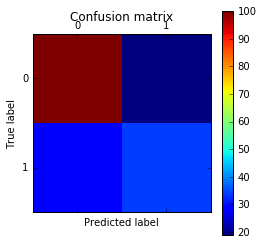

In [120]:
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(Confusion_Matrix)
plt.show()


** Here the model was able to classify 34 of 47 total schools. In perspective, If the model said that a school did have the makeup to be in the top 50 percentile, that school would be miss classified every one in three times. The rate for false negatives is slightly improved at 1 in 4. **

** Here is one model for predicting student outcomes, use this model with others to crossvalidate **

****
## KNN
** Is there a way to group our schools to give insight into major trends **

In [121]:

# instantiate learning model (k = 32)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(Train_Features_Migrant, Train_Target_Migrant)

# predict the response
KNN_Prediction_Migrant = knn.predict(Test_Features_Migrant)
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,KNN_Prediction_Migrant)



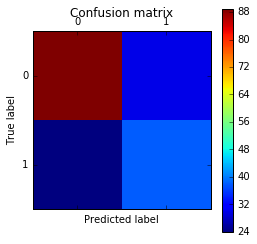

[[89 30]
 [24 38]]


In [122]:
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(Confusion_Matrix)

** It seems that KNN is resulting in far fewer false positives.**

# L1 Regularization

In [123]:
Lasso_Reg_Migrant = linear_model.Lasso(alpha = 0.1)
Lasso_Reg_Migrant.fit(Train_Features_Migrant,Train_Target_Migrant)
Lasso_Prediction_Migrant = Lasso_Reg_Migrant.predict(Test_Features_Migrant)

print(Lasso_Prediction_Migrant)


[ 0.16813941  0.06025524  0.58554249  0.14808665  0.18068132  0.48512778
  0.36305897  1.52384665  1.09604204  0.13875922  0.94411856  0.29645025
  0.35011212  0.56449946  0.8772476   0.18030608  0.64539332  0.24722537
  0.25058692  0.61176974  0.65185646  0.28853748  0.62814328  0.56127441
  0.2600698   0.30012882  0.6670478   0.26114343  0.20491354  0.53271132
  0.09757534  0.24841207  0.15316759  0.21009819  1.12674572  0.24072609
  0.74550505  0.17207789  0.7954744   1.26846914  0.28917172  0.34236247
  0.07326702  0.33014473  0.30272762  0.28100034  0.54008312  0.28610983
  0.55258838  0.15105     0.08153806  0.16771365  0.26188896  0.32089575
  0.93640365  0.16060802  0.61829436  0.61737925  0.29130741  0.32347532
  0.15807319  0.2087886   0.08975189  0.20714082  0.21572591  0.88529427
  0.25205083  0.1868141   1.05554978  0.24777431  0.16168643  0.19147839
  0.20639564  0.7843456   0.39379573  0.06732219  0.15258803  0.2289421
  0.16794011  0.23691218  0.15654355  0.94072285  0.

**The prediction needs to be modified so that we can use a confusion matrix to assess the model. currently it is a continuos value but it needs to be a discreet 1 or 0**

[[102  17]
 [ 29  33]]


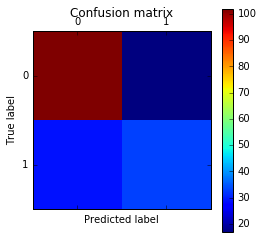

In [124]:
Lasso_Prediction_Migrant = Lasso_Prediction_Migrant>.5
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,Lasso_Prediction_Migrant)
print(Confusion_Matrix)
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

** At present this model is not more effective than our previous KNN solution **

In [125]:
Ridge_Reg_Migrant = linear_model.Ridge(alpha=.5)
Ridge_Reg_Migrant.fit(Train_Features_Migrant,Train_Target_Migrant)
Ridge_Reg_Prediction = Ridge_Reg_Migrant.predict(Test_Features_Migrant)

** this data will also need to be modified before it can used with confusion matrix**

[[102  17]
 [ 29  33]]


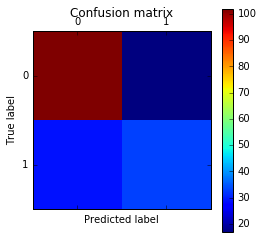

In [126]:
Ridge_Reg_Prediction = Ridge_Reg_Prediction>.5
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,Lasso_Prediction_Migrant)
print(Confusion_Matrix)
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Support Vector Machine

In [127]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(Train_Features_Migrant, Train_Target_Migrant)
SVC_Prediction_Migrant = svm.predict(Test_Features_Migrant)



[[119   0]
 [ 62   0]]


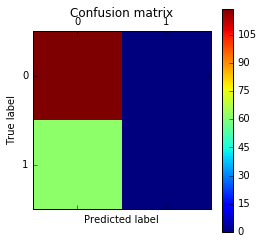

In [128]:

Confusion_Matrix = confusion_matrix(Test_Target_Migrant,SVC_Prediction_Migrant)
print(Confusion_Matrix)
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## KMeans

# this clustering method requires a number of clusters, before we run our model, find the clustering with the smallest interia

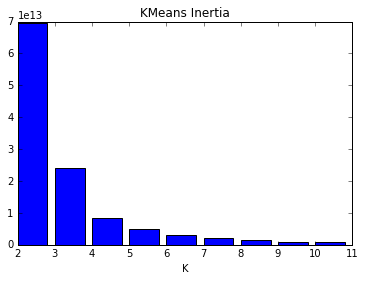

In [129]:
from sklearn.cluster import KMeans
inertias = np.empty(9)
for K in range(2,11):
    kmeans = KMeans(K).fit(Train_Features_Migrant)
#    print(K)
    inertias[K-2] = kmeans.inertia_
#inertias.dropna()
#inertias[~np.isnan(inertias).any(axis=1)]
_ = plt.bar(range(2,11),inertias)
_ = plt.title('KMeans Inertia')
_ = plt.xlabel('K')


## Model Selection

KNN had the best confusion matrix for this aplication. implement the Elbow Method to arrive at the optimal number of neighbors

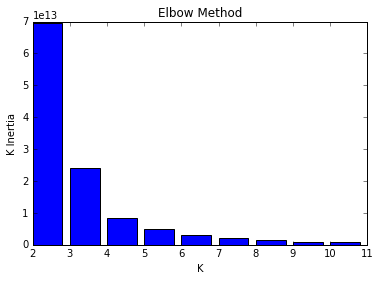

In [130]:
from sklearn.cluster import KMeans
inertias = np.empty(9)
for K in range(2,11):
    kmeans = KMeans(K).fit(Train_Features_Migrant)
#    print(K)
    inertias[K-2] = kmeans.inertia_
_ = plt.bar(range(2,11),inertias)
_ = plt.title('Elbow Method')
_ = plt.xlabel('K')
_ = plt.ylabel('K Inertia')


** the elbow could be said to be at 2 or 3, in this case 3 neighbors had the best confusion matrix so that will be our K **

## All School Prediction
** Selecting KMeans as the most effective model. use the model, the data from the migrant schools, and the demographics from all the schools to create an estamate of the perfornce of schools with less than 10 migrant students **

In [131]:
Features_Migrant = Migrant_School_List.drop(['Mean Scale Score','County Name','District Name'],axis=1)
Target_Migrant = Migrant_School_List['Mean Scale Score']>np.percentile(All_School_List['Mean Scale Score'],50)

In [132]:
General_School_List = All_School_List[['School Code','Mean Scale Score']].rename(index=str, columns={ "Mean Scale Score": "General Mean Scale Score"})
                                      
Migrant_With_General_Scores = Migrant_School_List.merge(General_School_List)
General_Scores_Features = Migrant_With_General_Scores.drop(['Mean Scale Score','County Name','District Name'],axis=1)
#contains evry school with thier average score to predict the migrant score of all schools
General_Predict_Features = All_School_List.merge(General_School_List)
General_Predict_Features = General_Predict_Features.drop(['Mean Scale Score','County Name','District Name'],axis=1)
General_Scores_Target = Migrant_With_General_Scores['Mean Scale Score']


#Create the Regression
With_Scores_Regression = LinearRegression()

#Train the Regression
With_Scores_Regression.fit(General_Scores_Features,General_Scores_Target)

General_Scores_Features.head()
#Predict Values
Score_Informed_Migrant_Prediction = With_Scores_Regression.predict(General_Predict_Features)
Prediction_df = General_Predict_Features
Prediction_df['Predicted_Migrant_Scores'] = Score_Informed_Migrant_Prediction
Prediction_df.head()


,Unnamed: 0,School Code,District Code,Zip Code,Total_Students,Per_Student_Spending,Median,Mean,Pop,YearsTeaching,Enrolled,Utilized,Percent_Eligible,Percent_Utilized,Sanctuary,Age,General Mean Scale Score,Predicted_Migrant_Scores
0,0,109694,65243,93638,19011.95,10950.81,40096.0,52034.0,49068.0,13.164474,897,814,0.91,0.907469,0.0,43.717105,2491.2750,2480.809323
1,1,109702,65243,93638,19011.95,10950.81,40096.0,52034.0,49068.0,13.164474,767,726,0.95,0.946545,0.0,43.717105,2425.3000,2421.052730
2,2,110957,65243,93638,19011.95,10950.81,40096.0,52034.0,49068.0,13.164474,745,678,0.91,0.910067,0.0,43.717105,2422.9125,2415.969562
3,3,113050,65243,93638,19011.95,10950.81,40096.0,52034.0,49068.0,13.164474,730,663,0.91,0.908219,0.0,43.717105,2444.8375,2437.883528
4,4,123620,65243,93638,19011.95,10950.81,40096.0,52034.0,49068.0,13.164474,164,158,0.96,0.963415,0.0,43.717105,2471.4500,2469.648178


_ = plt.scatter(Prediction_df['General Mean Scale Score'],Prediction_df['Predicted_Migrant_Scores'],c=Prediction_df['Median'])
_=plt.xlabel('Genral Population')
_=plt.ylabel('Predicted Migrant Population')
#adding a slope 1 line representing schools where Migrants are predicted to do as well as the general population
x1, y1 = [2000, 3000], [2000, 3000]
plt.title('General Population Scores Vs. Predicted Migrant Scores')
plt.plot(x1, y1, marker = 'o')

Those Observations above the blue line are of particular interest. Immediatly you notice that those observations are also overwhelming dark blue meaning these map to low income schools

In [136]:
KNN = 
len(Migrant_School_List)

361